Solution of the exercises
=========================

Solution of exercise 1
----------------------

Here's the solution for the IPT Solver written as a class:

In [16]:
from pytriqs.gf import *
import numpy as np
from math import pi
class IPTSolver:
    def __init__(self, beta):
        self.beta = beta

        # Matsubara frequency Green's functions
        self.g = GfImFreq(indices=[0], beta=beta, name='G')
        self.g0 = self.g.copy() # self.g0 will be set by the user after initialization
        self.sigma = self.g.copy()
        
        # Imaginary time
        self.g0t = GfImTime(indices=[0], beta = self.beta, name='G0t')
        self.sigmat = self.g0t.copy()
        
    def solve(self, U):
        self.g0t << Fourier(self.g0) #         self.g0t << InverseFourier(self.g0)
        self.sigmat << (U**2) * self.g0t * self.g0t * self.g0t
        self.sigma << Fourier(self.sigmat)
        
        # Dyson
        self.g << inverse(inverse(self.g0) - self.sigma)
        # or:
        # self.g << self.g0 * inverse(1.0 - self.sigma * self.g0)

Solution of exercise 2
----------------------

This is the implementation of the DMFT loop, with a plot of the interacting spectral function at every iteration.

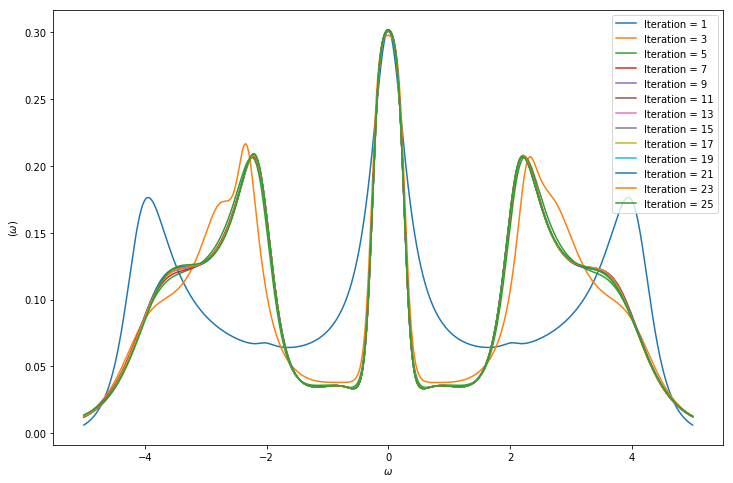

In [29]:
from pytriqs.plot.mpl_interface import *
%matplotlib inline
# change scale of all figures to make them bigger
import matplotlib as mpl
mpl.rcParams['savefig.dpi']=100 

t = 1.0
U = 5.0
beta = 20
n_loops = 25

S = IPTSolver(beta = beta)
S.g << SemiCircular(2*t)

fig = plt.figure(figsize=(12,8))

for i in range(n_loops):
    S.g0 << inverse( iOmega_n - t**2 * S.g )
    S.solve(U = U)
    
    # Get real axis function with Pade approximation
    greal = GfReFreq(indices = [1], window = (-5.0,5.0))
    greal.set_from_pade(S.g, 100, 0.01)
    
    if i % 2 == 0:
        oplot(-greal.imag/pi, figure = fig, label = "Iteration = %i" % (i+1))

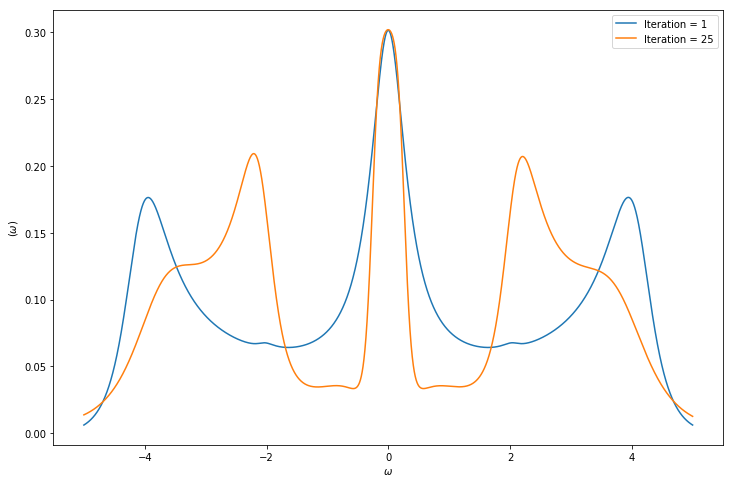

In [32]:
S = IPTSolver(beta = beta)
S.g << SemiCircular(2*t)

fig = plt.figure(figsize=(12,8))

for i in range(n_loops):
    S.g0 << inverse( iOmega_n - t**2 * S.g )
    S.solve(U = U)
    
    # Get real axis function with Pade approximation
    greal = GfReFreq(indices = [1], window = (-5.0,5.0))
    greal.set_from_pade(S.g, 100, 0.01)
    
    if i % 24 == 0:
        oplot(-greal.imag/pi, figure = fig, label = "Iteration = %i" % (i+1))

## plot self energy

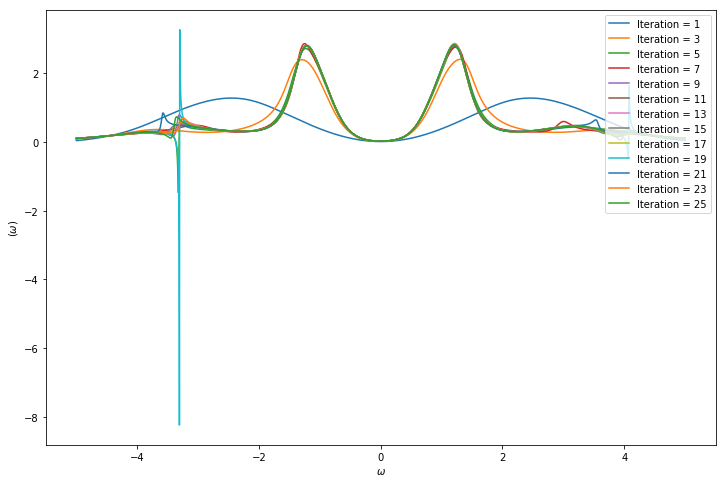

In [30]:
from pytriqs.plot.mpl_interface import *
%matplotlib inline
# change scale of all figures to make them bigger
import matplotlib as mpl
mpl.rcParams['savefig.dpi']=100 

t = 1.0
U = 5.0
beta = 20
n_loops = 25

S = IPTSolver(beta = beta)
S.g << SemiCircular(2*t)

fig = plt.figure(figsize=(12,8))

for i in range(n_loops):
    S.g0 << inverse( iOmega_n - t**2 * S.g )
    S.solve(U = U)
    
    # Get real axis function with Pade approximation
    sereal = GfReFreq(indices = [1], window = (-5.0,5.0))
    sereal.set_from_pade(S.sigma, 100, 0.01)
    
    if i % 2 == 0:
        oplot(-sereal.imag/pi, figure = fig, label = "Iteration = %i" % (i+1))

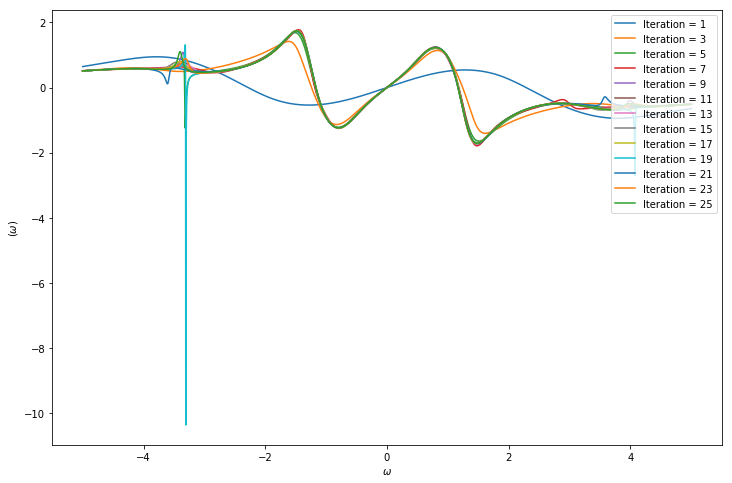

In [31]:
S = IPTSolver(beta = beta)
S.g << SemiCircular(2*t)

fig = plt.figure(figsize=(12,8))
for i in range(n_loops):
    S.g0 << inverse( iOmega_n - t**2 * S.g )
    S.solve(U = U)
    
    # Get real axis function with Pade approximation
    sereal = GfReFreq(indices = [1], window = (-5.0,5.0))
    sereal.set_from_pade(S.sigma, 100, 0.01)
    
    if i % 2 == 0:
        oplot(-sereal.real/pi, figure = fig, label = "Iteration = %i" % (i+1))

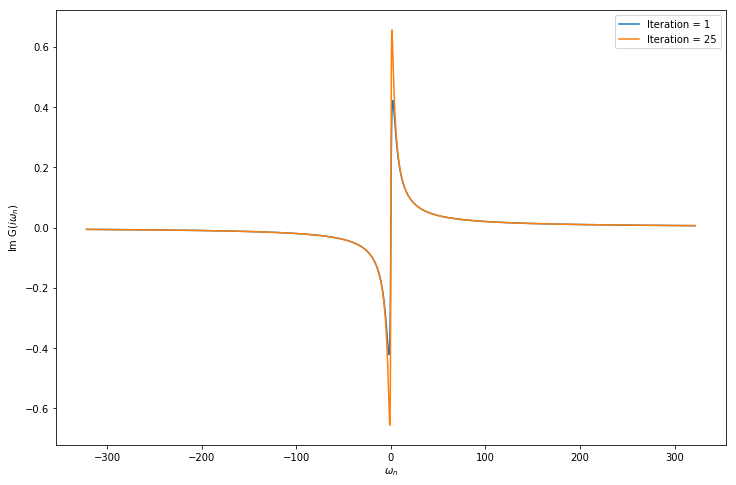

In [26]:
S = IPTSolver(beta = beta)
S.g << SemiCircular(2*t)

fig = plt.figure(figsize=(12,8))
for i in range(n_loops):
    S.g0 << inverse( iOmega_n - t**2 * S.g )
    S.solve(U = U)
    
    if i % 24 == 0:
        oplot(-S.sigma.imag/pi, figure = fig, label = "Iteration = %i" % (i+1))

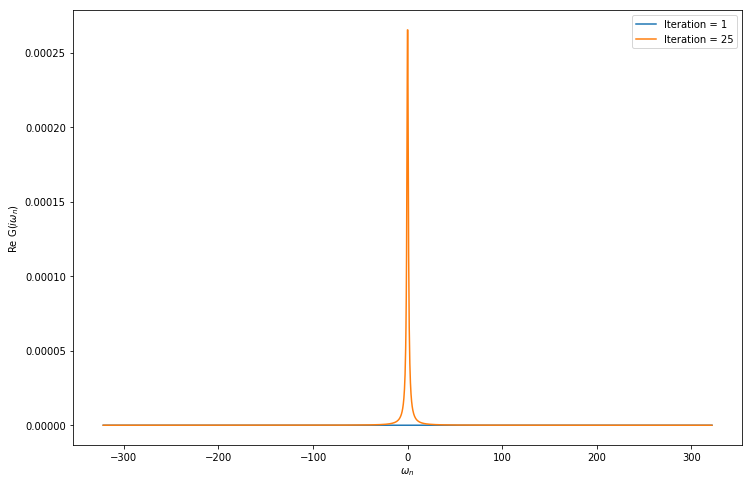

In [27]:
S = IPTSolver(beta = beta)
S.g << SemiCircular(2*t)

fig = plt.figure(figsize=(12,8))
for i in range(n_loops):
    S.g0 << inverse( iOmega_n - t**2 * S.g )
    S.solve(U = U)
    
    if i % 24 == 0:
        oplot(-S.sigma.real/pi, figure = fig, label = "Iteration = %i" % (i+1))

Solution of exercise 3
----------------------

From the solution above it seems that 25 iterations are enough to converge the
DMFT loop. Now it is easy to repeat this for several values of $U$.

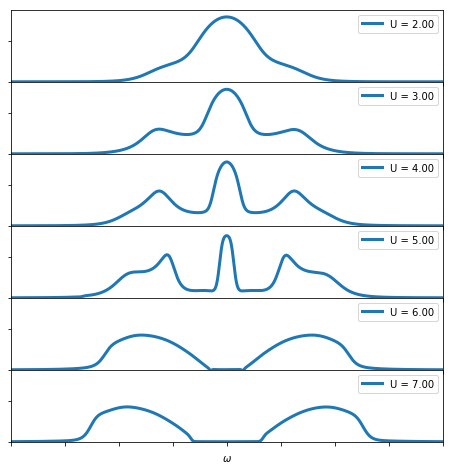

In [6]:
import numpy as np

t = 1.0
beta = 20
n_loops = 25

fig = plt.figure(figsize=(6,6))
pn = 0 # iteration counter for plotting

for U in np.arange(2.0, 7.5, 1.0):
    
    S = IPTSolver(beta = beta)
    S.g << SemiCircular(2*t)

    # DMFT
    for i in range(n_loops):
        S.g0 << inverse( iOmega_n - t**2 * S.g )
        S.solve(U)

    # Get the real-axis with Pade approximation
    greal = GfReFreq(indices = [0], window = (-8.0,8.0))
    greal.set_from_pade(S.g, 100, 0.01)
    
    # plotting
    ax = fig.add_axes([0,1.-(pn+1)/6.,1,1./6.]) # subplot
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    oplot(-greal.imag/pi, linewidth=3, label = "U = %.2f" % U)
    plt.xlim(-8,8)
    plt.ylim(0,0.35)
    plt.ylabel("")
    pn = pn + 1

Comparison with the literature
-------------------------------

You can compare the result above with what can be found in the literature
(review of Antoine Georges et al.)

<img src="files/mott.png" width=30%>